In [1]:
from src.few_shot_learning import load_cinic10, calculate_accuracy, plot_confusion_matrix, FewShotConvNeXt, train_few_shot_convnext, set_seed
from src.plots_functions import multiple_runs_with_uncertainty_band

In [2]:
set_seed(213)

In [3]:
data_dir = "../../data"
dataset_name = "augmented_cinic10_cutmix"
train_dataloader = load_cinic10(data_dir, few_shot_per_class=100, dataset_name=dataset_name, split="none")
test_dataloader = load_cinic10(data_dir, few_shot_per_class=100, split="test")

In [4]:
metrics_list = []
for _ in range(5):
    model = FewShotConvNeXt()
    metrics, time = train_few_shot_convnext(model, train_dataloader, test_dataloader, epochs=10, lr=0.0001, optimizer='adam', scheduling=True)
    metrics_list.append(metrics)

Train loss: 2.37880 | Train accuracy: 18.95%
Test loss: 1.78874 | Test accuracy: 38.99%

Train loss: 1.75362 | Train accuracy: 41.57%
Test loss: 1.83566 | Test accuracy: 36.51%

Train loss: 0.98024 | Train accuracy: 67.56%
Test loss: 1.94069 | Test accuracy: 37.10%

Train loss: 0.25130 | Train accuracy: 92.66%
Test loss: 2.56183 | Test accuracy: 35.12%

Train loss: 0.07765 | Train accuracy: 98.02%
Test loss: 2.59864 | Test accuracy: 39.09%

Train loss: 0.02357 | Train accuracy: 99.40%
Test loss: 2.62136 | Test accuracy: 39.29%

Train loss: 0.00294 | Train accuracy: 100.00%
Test loss: 2.61788 | Test accuracy: 38.69%

Train loss: 0.00166 | Train accuracy: 100.00%
Test loss: 2.62918 | Test accuracy: 38.10%

Train loss: 0.00133 | Train accuracy: 100.00%
Test loss: 2.64910 | Test accuracy: 37.90%

Train loss: 0.00113 | Train accuracy: 100.00%
Test loss: 2.64208 | Test accuracy: 37.70%


Train time on cuda: 145.229 seconds
Train loss: 2.38657 | Train accuracy: 17.86%
Test loss: 1.91426 | Tes

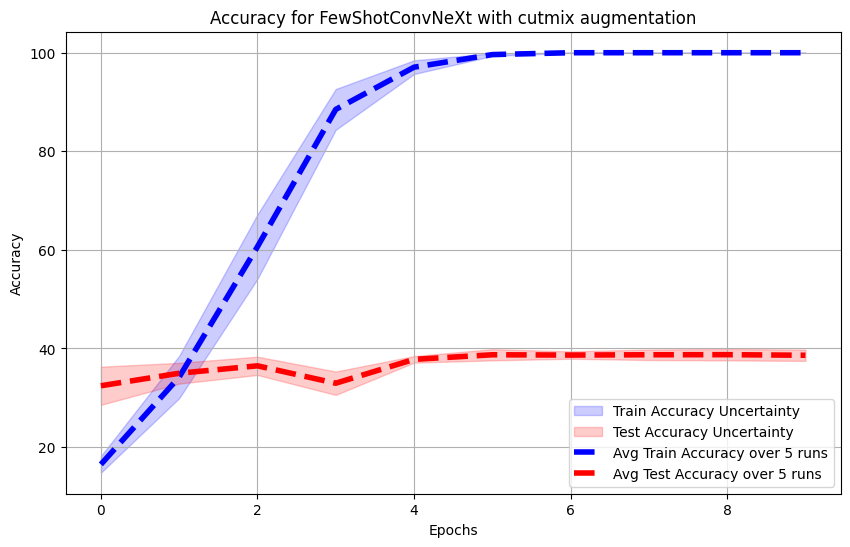

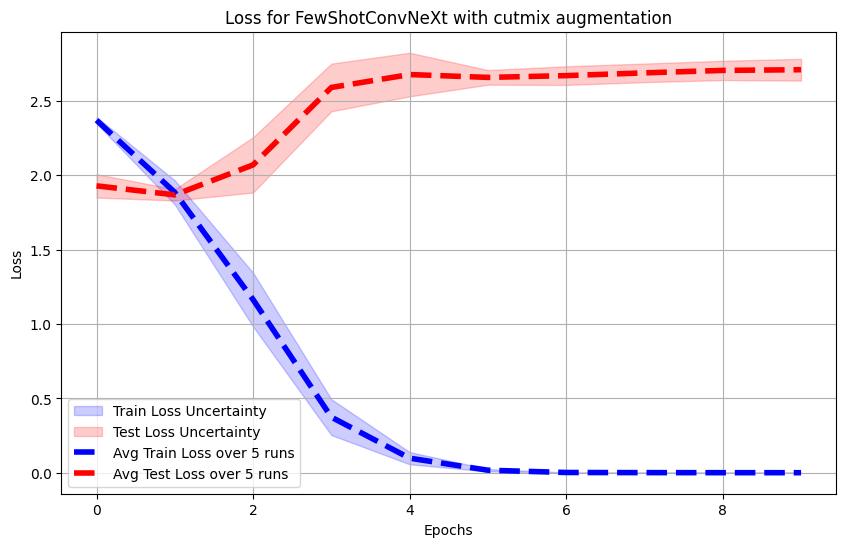

In [5]:
experiment_name = "FewShotConvNeXt with cutmix augmentation"
multiple_runs_with_uncertainty_band(metrics_list, f"Accuracy for {experiment_name}", f"Loss for {experiment_name}")